In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
import time

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = tfk.datasets.mnist.load_data()

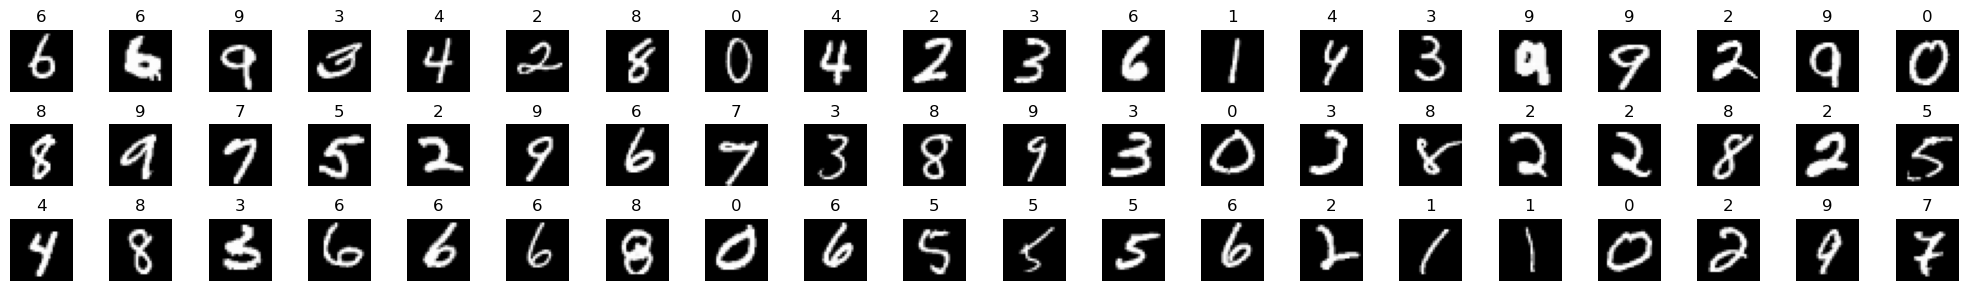

In [3]:
r = 3
c = 20
total = r*c

n = np.random.randint(0, X_train.shape[0], total)

fig, ax = plt.subplots(nrows=r, ncols=c, figsize=(c, r))

for ix,val in enumerate(n):
    row=ix//c
    col=ix%c
    ax[row,col].imshow(X_train[val],cmap='gray')
    ax[row,col].set_title(str(y_train[val]))
    ax[row,col].axis('off')

plt.tight_layout()
plt.show()

#### flatten data

In [4]:
X_train_flattened = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_flattened = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

#### dataset seems fairly balanced

#### label encoding is not required

#### scaling data

In [5]:
X_train_scaled = X_train_flattened/255
X_test_scaled = X_test_flattened/255

#### ML Models on three datasets will be created,
#### 1) raw data:    `X_train_raw`,      `X_test_raw`
#### 2) after dimensionality reduction using PCA:    `X_train_pca`,      `X_test_pca`
#### 3) after dimensionality reduction using LDA:    `X_train_lda`,      `X_test_lda`

#### DL Models (ANN, CNN) on the RAW dataset will be created

In [6]:
X_train_raw = X_train_scaled.copy()
X_test_raw = X_test_scaled.copy()

In [7]:
X_train_raw.shape

(60000, 784)

In [8]:
X_train_pca = X_train_scaled.copy()
X_test_pca = X_test_scaled.copy()

pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

In [9]:
X_train_pca.shape

(60000, 154)

In [10]:
X_train_lda = X_train_scaled.copy()
X_test_lda = X_test_scaled.copy()

lda = LinearDiscriminantAnalysis(n_components=9)

X_train_lda = lda.fit_transform(X_train_lda, y_train)
X_test_lda = lda.transform(X_test_lda)

In [11]:
X_train_lda.shape

(60000, 9)

#### 1.1 SGD Classifier Model with Raw Data

In [12]:
#manual change - starts
model_name = "SGD Classifier"
data_name = "Raw Data"
X1 = X_train_raw.copy()
X2 = X_test_raw.copy()
m1 = SGDClassifier()

#Tuning Hyperparameters
param = {
    'loss':['log_loss','hinge'],
    'penalty':['l1','l2','elasticnet'],
    'max_iter':[100,200,300,400,500]
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = SGDClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Time taken by GridSearchCV: 954.9011805057526
SGD Classifier | Raw Data | best loss : hinge

SGD Classifier | Raw Data | best max_iter : 100

SGD Classifier | Raw Data | best penalty : elasticnet

SGD Classifier | Raw Data | best train accuracy : 0.9118999999999999

SGD Classifier | Raw Data | Final test Accuracy : 0.9105


#### 1.2 SGD Classifier model with PCA data

In [13]:
#manual change - starts
model_name = "SGD Classifier"
data_name = "PCA Data"
X1 = X_train_pca.copy()
X2 = X_test_pca.copy()
m1 = SGDClassifier()

#Tuning Hyperparameters
param = {
    'loss':['log_loss','hinge'],
    'penalty':['l1','l2','elasticnet'],
    'max_iter':[100,200,300,400,500]
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = SGDClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Time taken by GridSearchCV: 319.6168854236603
SGD Classifier | PCA Data | best loss : log_loss

SGD Classifier | PCA Data | best max_iter : 500

SGD Classifier | PCA Data | best penalty : l2

SGD Classifier | PCA Data | best train accuracy : 0.9096833333333333

SGD Classifier | PCA Data | Final test Accuracy : 0.9138


#### 1.3 SGD Classifier model with LDA data

In [14]:
#manual change - starts
model_name = "SGD Classifier"
data_name = "LDA Data"
X1 = X_train_lda.copy()
X2 = X_test_lda.copy()
m1 = SGDClassifier()

#Tuning Hyperparameters
param = {
    'loss':['log_loss','hinge'],
    'penalty':['l1','l2','elasticnet'],
    'max_iter':[100,200,300,400,500]
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = SGDClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Time taken by GridSearchCV: 18.868991136550903
SGD Classifier | LDA Data | best loss : log_loss

SGD Classifier | LDA Data | best max_iter : 400

SGD Classifier | LDA Data | best penalty : l1

SGD Classifier | LDA Data | best train accuracy : 0.8787666666666667

SGD Classifier | LDA Data | Final test Accuracy : 0.8777


#### 2.1 Ridge Classifier model with Raw Data

In [15]:
#manual change - starts
model_name = "Ridge Classifier"
data_name = "Raw Data"
X1 = X_train_raw.copy()
X2 = X_test_raw.copy()
m1 = RidgeClassifier()

#Tuning Hyperparameters
param = {
    'alpha' : [1, 0.1, 0.01, 0.001],
    'fit_intercept': [True,False],
    'copy_X': [True,False],
    'max_iter':[200,500,1000]
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = RidgeClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Time taken by GridSearchCV: 170.67467713356018
Ridge Classifier | Raw Data | best alpha : 1

Ridge Classifier | Raw Data | best copy_X : True

Ridge Classifier | Raw Data | best fit_intercept : True

Ridge Classifier | Raw Data | best max_iter : 200

Ridge Classifier | Raw Data | best train accuracy : 0.84985

Ridge Classifier | Raw Data | Final test Accuracy : 0.8604


#### 2.2 Ridge Classifier model with PCA data

In [16]:
#manual change - starts
model_name = "Ridge Classifier"
data_name = "PCA Data"
X1 = X_train_pca.copy()
X2 = X_test_pca.copy()
m1 = RidgeClassifier()

#Tuning Hyperparameters
param = {
    'alpha' : [1, 0.1, 0.01, 0.001],
    'fit_intercept': [True,False],
    'copy_X': [True,False],
    'max_iter':[200,500,1000]
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = RidgeClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Time taken by GridSearchCV: 10.120384216308594
Ridge Classifier | PCA Data | best alpha : 1

Ridge Classifier | PCA Data | best copy_X : True

Ridge Classifier | PCA Data | best fit_intercept : False

Ridge Classifier | PCA Data | best max_iter : 200

Ridge Classifier | PCA Data | best train accuracy : 0.8511833333333334

Ridge Classifier | PCA Data | Final test Accuracy : 0.8613


#### 2.3 Ridge Classifier model with LDA data

In [17]:
#manual change - starts
model_name = "Ridge Classifier"
data_name = "LDA Data"
X1 = X_train_lda.copy()
X2 = X_test_lda.copy()
m1 = RidgeClassifier()

#Tuning Hyperparameters
param = {
    'alpha' : [1, 0.1, 0.01, 0.001],
    'fit_intercept': [True,False],
    'copy_X': [True,False],
    'max_iter':[200,500,1000]
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = RidgeClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Time taken by GridSearchCV: 1.1113519668579102
Ridge Classifier | LDA Data | best alpha : 1

Ridge Classifier | LDA Data | best copy_X : True

Ridge Classifier | LDA Data | best fit_intercept : False

Ridge Classifier | LDA Data | best max_iter : 200

Ridge Classifier | LDA Data | best train accuracy : 0.8593

Ridge Classifier | LDA Data | Final test Accuracy : 0.8612


#### 3.1 KNN Classifier model with raw data

In [18]:
#manual change - starts
model_name = "KNN Classifier"
data_name = "Raw Data"
X1 = X_train_raw.copy()
X2 = X_test_raw.copy()
m1 = KNeighborsClassifier()

#Tuning Hyperparameters
param = {
    'n_neighbors' : [3,5,7,9],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'p': [1,2]
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = KNeighborsClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Time taken by GridSearchCV: 9763.35895562172
KNN Classifier | Raw Data | best algorithm : auto

KNN Classifier | Raw Data | best n_neighbors : 3

KNN Classifier | Raw Data | best p : 2

KNN Classifier | Raw Data | best train accuracy : 0.9700666666666666



C:\Users\grv06\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\grv06\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\grv06\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\grv06\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

KNN Classifier | Raw Data | Final test Accuracy : 0.9705


#### 3.2 KNN Classifier model with PCA data

In [19]:
#manual change - starts
model_name = "KNN Classifier"
data_name = "PCA Data"
X1 = X_train_pca.copy()
X2 = X_test_pca.copy()
m1 = KNeighborsClassifier()

#Tuning Hyperparameters
param = {
    'n_neighbors' : [3,5,7,9],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'p': [1,2]
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = KNeighborsClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Time taken by GridSearchCV: 2584.1032915115356
KNN Classifier | PCA Data | best algorithm : auto

KNN Classifier | PCA Data | best n_neighbors : 3

KNN Classifier | PCA Data | best p : 2

KNN Classifier | PCA Data | best train accuracy : 0.9724833333333333

KNN Classifier | PCA Data | Final test Accuracy : 0.9722


#### 3.3 KNN Classifier model with LDA data

In [20]:
#manual change - starts
model_name = "KNN Classifier"
data_name = "LDA Data"
X1 = X_train_lda.copy()
X2 = X_test_lda.copy()
m1 = KNeighborsClassifier()

#Tuning Hyperparameters
param = {
    'n_neighbors' : [3,5,7,9],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'p': [1,2]
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = KNeighborsClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Time taken by GridSearchCV: 116.89302039146423
KNN Classifier | LDA Data | best algorithm : auto

KNN Classifier | LDA Data | best n_neighbors : 7

KNN Classifier | LDA Data | best p : 2

KNN Classifier | LDA Data | best train accuracy : 0.9210166666666666

KNN Classifier | LDA Data | Final test Accuracy : 0.9183


#### 4.1 Support Vector Classifier model with raw data

In [21]:
#manual change - starts
model_name = "SVC Classifier"
data_name = "Raw Data"
X1 = X_train_raw.copy()
X2 = X_test_raw.copy()
m1 = SVC()

#Tuning Hyperparameters
param = {
    'kernel' : ['linear','poly','rbf','sigmoid','precomputed'],
    'degree': [3,4,5,6],
    'gamma': ['auto','scale']
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = SVC(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits


ValueError: X should be a square kernel matrix

#### 4.2 Support Vector Classifier with PCA data

In [ ]:
#manual change - starts
model_name = "SVC Classifier"
data_name = "PCA Data"
X1 = X_train_pca.copy()
X2 = X_test_pca.copy()
m1 = SVC()

#Tuning Hyperparameters
param = {
    'kernel' : ['linear','poly','rbf','sigmoid','precomputed'],
    'degree': [3,4,5,6],
    'gamma': ['auto','scale']
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = SVC(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

#### 4.3 Support Vector Classifier with LDA data

In [ ]:
#manual change - starts
model_name = "SVC Classifier"
data_name = "LDA Data"
X1 = X_train_lda.copy()
X2 = X_test_lda.copy()
m1 = SVC()

#Tuning Hyperparameters
param = {
    'kernel' : ['linear','poly','rbf','sigmoid','precomputed'],
    'degree': [3,4,5,6],
    'gamma': ['auto','scale']
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = SVC(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

#### 5.1 Decision Tree Classifier model with raw data

In [ ]:
#manual change - starts
model_name = "Decision Tree Classifier"
data_name = "Raw Data"
X1 = X_train_raw.copy()
X2 = X_test_raw.copy()
m1 = DecisionTreeClassifier()

#Tuning Hyperparameters
param = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth': [None,5,10,15],
    'max_features':[None,'sqrt','log2']
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = DecisionTreeClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

#### 5.2 Decision Tree Classifier model with PCA data

In [ ]:
#manual change - starts
model_name = "Decision Tree Classifier"
data_name = "PCA Data"
X1 = X_train_pca.copy()
X2 = X_test_pca.copy()
m1 = DecisionTreeClassifier()

#Tuning Hyperparameters
param = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth': [None,5,10,15],
    'max_features':[None,'sqrt','log2']
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = DecisionTreeClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

#### 5.3 Decision Tree Classifier model with LDA data

In [ ]:
#manual change - starts
model_name = "Decision Tree Classifier"
data_name = "LDA Data"
X1 = X_train_lda.copy()
X2 = X_test_lda.copy()
m1 = DecisionTreeClassifier()

#Tuning Hyperparameters
param = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth': [None,5,10,15],
    'max_features':[None,'sqrt','log2']
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = DecisionTreeClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

#### 6.1 Random Forest Classifier model with raw data

In [ ]:
#manual change - starts
model_name = "Random Forest Classifier"
data_name = "Raw Data"
X1 = X_train_raw.copy()
X2 = X_test_raw.copy()
m1 = RandomForestClassifier()

#Tuning Hyperparameters
param = {
    'n_estimators' : [100,200,300,400,500],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth': [None,1,2,3,4,5],
    'max_features':[None,'sqrt','log2']
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = RandomForestClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

#### 6.2 Random Forest Classifier model with PCA data

In [ ]:
#manual change - starts
model_name = "Random Forest Classifier"
data_name = "PCA Data"
X1 = X_train_pca.copy()
X2 = X_test_pca.copy()
m1 = RandomForestClassifier()

#Tuning Hyperparameters
param = {
    'n_estimators' : [100,200,300,400,500],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth': [None,1,2,3,4,5],
    'max_features':[None,'sqrt','log2']
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = RandomForestClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")

#### 6.3 Random Forest Classifier model with LDA data

In [ ]:
#manual change - starts
model_name = "Random Forest Classifier"
data_name = "LDA Data"
X1 = X_train_lda.copy()
X2 = X_test_lda.copy()
m1 = RandomForestClassifier()

#Tuning Hyperparameters
param = {
    'n_estimators' : [100,200,300,400,500],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth': [None,1,2,3,4,5],
    'max_features':[None,'sqrt','log2']
}
#manual change - ends

gs = GridSearchCV(
    estimator=m1,
    param_grid=param,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)
start_time = time.time()
gs.fit(X1, y_train)
end_time = time.time()
print(f"Time taken by GridSearchCV: {end_time - start_time}")

#Printing Best Hyperparameters
for key,val in gs.best_params_.items():
    print(f"{model_name} | {data_name} | best {key} : {val}\n")
print(f"{model_name} | {data_name} | best train accuracy : {gs.best_score_}\n")

#manual change - starts
#fitting model after hyperparameter tuning
m2 = RandomForestClassifier(**gs.best_params_)
#manual change - ends

m2.fit(X1, y_train)

#prediction after hyperparameter tuning
y_pred = m2.predict(X2)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} | {data_name} | Final test Accuracy : {accuracy}")